<a href="https://colab.research.google.com/drive/1tAgbjrtiVSNS4MmNjzobwZF5Vd1EWMwy?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas Basics

[Here](https://pandas.pydata.org/pandas-docs/stable/10min.html) you can find a 10 minutes to pandas guide. This notebook is a summary of the most important things you need to know about pandas.

We'll cover the following topics:
* Series
* DataFrame
* Reindexing
* Dropping Entries
* Indexing, Selecting, Filtering
* Arithmetic and Data Alignment
* Function Application and Mapping
* Sorting and Ranking
* Axis Indices with Duplicate Values

In [1]:
import pandas as pd
import numpy as np

## Series


A Series is a one-dimensional array-like object containing an array of data and an associated array of data labels.  The data can be any NumPy data type and the labels are the Series' index.

Create a Series:

In [2]:
ser_1 = pd.Series([1, 1, 2, -3, -5, 8, 13])
ser_1

0     1
1     1
2     2
3    -3
4    -5
5     8
6    13
dtype: int64

Get the array representation of a Series:

In [3]:
ser_1.values

array([ 1,  1,  2, -3, -5,  8, 13])

Index objects are immutable and hold the axis labels and metadata such as names and axis names.

Get the index of the Series:

In [4]:
ser_1.index

RangeIndex(start=0, stop=7, step=1)

Create a Series with a custom index:

In [5]:
ser_2 = pd.Series([1, 1, 2, -3, -5], index=['a', 'b', 'c', 'd', 'e'])
ser_2

a    1
b    1
c    2
d   -3
e   -5
dtype: int64

Get a value from a Series:

In [6]:
ser_2[4] == ser_2['e']

True

Get a set of values from a Series by passing in a list:

In [7]:
ser_2[['c', 'a', 'b']]

c    2
a    1
b    1
dtype: int64

Get values great than 0:

In [8]:
ser_2[ser_2 > 0]

a    1
b    1
c    2
dtype: int64

Scalar multiply:

In [9]:
ser_2 * 2

a     2
b     2
c     4
d    -6
e   -10
dtype: int64

Apply a numpy math function:

In [10]:
np.exp(ser_2)

a    2.718282
b    2.718282
c    7.389056
d    0.049787
e    0.006738
dtype: float64

A Series is like a fixed-length, ordered dict.  

Create a series by passing in a dict:

In [11]:
dict_1 = {'foo' : 100, 'bar' : 200, 'baz' : 300}
ser_3 = pd.Series(dict_1)
ser_3

foo    100
bar    200
baz    300
dtype: int64

Re-order a Series by passing in an index (indices not found are NaN):

In [12]:
index = ['foo', 'bar', 'baz', 'qux']
ser_4 = pd.Series(dict_1, index=index)
ser_4

foo    100.0
bar    200.0
baz    300.0
qux      NaN
dtype: float64

Check for NaN with the pandas method:

In [13]:
pd.isna(ser_4)

foo    False
bar    False
baz    False
qux     True
dtype: bool

Check for NaN with the Series method:

In [14]:
ser_4.isna()

foo    False
bar    False
baz    False
qux     True
dtype: bool

Series automatically aligns differently indexed data in arithmetic operations:

In [15]:
ser_3 + ser_4

bar    400.0
baz    600.0
foo    200.0
qux      NaN
dtype: float64

Name a Series:

In [16]:
ser_4.name = 'foobarbazqux'

Name a Series index:

In [17]:
ser_4.index.name = 'label'

In [18]:
ser_4

label
foo    100.0
bar    200.0
baz    300.0
qux      NaN
Name: foobarbazqux, dtype: float64

Rename a Series' index in place:

In [19]:
ser_4.index = ['fo', 'br', 'bz', 'qx']
ser_4

fo    100.0
br    200.0
bz    300.0
qx      NaN
Name: foobarbazqux, dtype: float64

## DataFrame

![](https://media.geeksforgeeks.org/wp-content/cdn-uploads/creating_dataframe1.png)


A DataFrame is a tabular data structure containing an ordered collection of columns.  Each column can have a different type.  DataFrames have both row and column indices and is analogous to a dict of Series.  Row and column operations are treated roughly symmetrically.  Columns returned when indexing a DataFrame are views of the underlying data, not a copy.  To obtain a copy, use the Series' copy method.

Create a DataFrame:

In [20]:
data_1 = {'state' : ['VA', 'VA', 'VA', 'MD', 'MD'],
          'year' : [2012, 2013, 2014, 2014, 2015],
          'pop' : [5.0, 5.1, 5.2, 4.0, 4.1]}
df_1 = pd.DataFrame(data_1)
df_1

,state,year,pop
0,VA,2012,5.0
1,VA,2013,5.1
2,VA,2014,5.2
3,MD,2014,4.0
4,MD,2015,4.1


Create a DataFrame specifying a sequence of columns:

In [21]:
df_2 = pd.DataFrame(data_1, columns=['year', 'state', 'pop'])
df_2

,year,state,pop
0,2012,VA,5.0
1,2013,VA,5.1
2,2014,VA,5.2
3,2014,MD,4.0
4,2015,MD,4.1


Like Series, columns that are not present in the data are NaN:

In [22]:
df_3 = pd.DataFrame(data_1, columns=['year', 'state', 'pop', 'unempl'])
df_3

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,NaN
3,2014,MD,4.0,NaN
4,2015,MD,4.1,NaN


Retrieve a column by key, returning a Series:


In [23]:
df_3['state']

0    VA
1    VA
2    VA
3    MD
4    MD
Name: state, dtype: object

Retrive a column by attribute, returning a Series:

In [24]:
df_3.year

0    2012
1    2013
2    2014
3    2014
4    2015
Name: year, dtype: int64

Retrieve a row by position:

In [25]:
df_3.index[0]

0

Update a column by assignment:

In [26]:
df_3['unempl'] = np.arange(5)
df_3

,year,state,pop,unempl
0,2012,VA,5.0,0
1,2013,VA,5.1,1
2,2014,VA,5.2,2
3,2014,MD,4.0,3
4,2015,MD,4.1,4


Assign a Series to a column (note if assigning a list or array, the length must match the DataFrame, unlike a Series):

In [27]:
unempl = pd.Series([6.0, 6.0, 6.1], index=[2, 3, 4])
df_3['unempl'] = unempl
df_3

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,6.0
3,2014,MD,4.0,6.0
4,2015,MD,4.1,6.1


Assign a new column that doesn't exist to create a new column:

In [28]:
df_3['state_dup'] = df_3['state']
df_3

,year,state,pop,unempl,state_dup
0,2012,VA,5.0,NaN,VA
1,2013,VA,5.1,NaN,VA
2,2014,VA,5.2,6.0,VA
3,2014,MD,4.0,6.0,MD
4,2015,MD,4.1,6.1,MD


Delete a column:

In [29]:
del df_3['state_dup']
df_3

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,6.0
3,2014,MD,4.0,6.0
4,2015,MD,4.1,6.1


Create a DataFrame from a nested dict of dicts (the keys in the inner dicts are unioned and sorted to form the index in the result, unless an explicit index is specified):

In [30]:
pop = {'VA' : {2013 : 5.1, 2014 : 5.2},
       'MD' : {2014 : 4.0, 2015 : 4.1}}
df_4 = pd.DataFrame(pop)
df_4

,VA,MD
2013,5.1,NaN
2014,5.2,4.0
2015,NaN,4.1


Transpose the DataFrame:

In [31]:
df_4.T

,2013,2014,2015
VA,5.1,5.2,NaN
MD,NaN,4.0,4.1


Create a DataFrame from a dict of Series:

In [32]:
data_2 = {'VA' : df_4['VA'][1:],
          'MD' : df_4['MD'][2:]}
df_5 = pd.DataFrame(data_2)
df_5

,VA,MD
2014,5.2,NaN
2015,NaN,4.1


Set the DataFrame index name:

In [33]:
df_5.index.name = 'year'
df_5

,VA,MD
year,,
2014,5.2,NaN
2015,NaN,4.1


Set the DataFrame columns name:

In [34]:
df_5.columns.name = 'state'
df_5

state,VA,MD
year,,
2014,5.2,NaN
2015,NaN,4.1


Return the data contained in a DataFrame as a 2D ndarray:

In [35]:
df_5.values

array([[5.2, nan],
       [nan, 4.1]])

If the columns are different dtypes, the 2D ndarray's dtype will accomodate all of the columns:

In [36]:
df_3.values

array([[2012, 'VA', 5.0, nan],
       [2013, 'VA', 5.1, nan],
       [2014, 'VA', 5.2, 6.0],
       [2014, 'MD', 4.0, 6.0],
       [2015, 'MD', 4.1, 6.1]], dtype=object)

## Reindexing

Create a new object with the data conformed to a new index.  Any missing values are set to NaN.

In [37]:
df_3

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,6.0
3,2014,MD,4.0,6.0
4,2015,MD,4.1,6.1


Reindexing rows returns a new frame with the specified index:

In [38]:
df_3.reindex(list(reversed(range(0, 6))))

,year,state,pop,unempl
5,NaN,NaN,NaN,NaN
4,2015.0,MD,4.1,6.1
3,2014.0,MD,4.0,6.0
2,2014.0,VA,5.2,6.0
1,2013.0,VA,5.1,NaN
0,2012.0,VA,5.0,NaN


Interpolate ordered data like a time series:

In [39]:
ser_5 = pd.Series(['foo', 'bar', 'baz'], index=[0, 2, 4])
ser_5

0    foo
2    bar
4    baz
dtype: object

In [40]:
ser_5.reindex(range(5), method='ffill')

0    foo
1    foo
2    bar
3    bar
4    baz
dtype: object

In [41]:
ser_5.reindex(range(5), method='bfill')

0    foo
1    bar
2    bar
3    baz
4    baz
dtype: object

Reindex columns:

In [42]:
df_3.reindex(columns=['state', 'pop', 'unempl', 'year'])

,state,pop,unempl,year
0,VA,5.0,NaN,2012
1,VA,5.1,NaN,2013
2,VA,5.2,6.0,2014
3,MD,4.0,6.0,2014
4,MD,4.1,6.1,2015


Reindex rows and columns while filling rows:

In [43]:
df_3.reindex(index=list(reversed(range(0, 6))),
             fill_value=0,
             columns=['state', 'pop', 'unempl', 'year'])

,state,pop,unempl,year
5,0,0.0,0.0,0
4,MD,4.1,6.1,2015
3,MD,4.0,6.0,2014
2,VA,5.2,6.0,2014
1,VA,5.1,NaN,2013
0,VA,5.0,NaN,2012


## Dropping Entries

Drop rows from a Series or DataFrame:

In [44]:
df_3

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,6.0
3,2014,MD,4.0,6.0
4,2015,MD,4.1,6.1


In [45]:
df_7 = df_3.drop([0, 1])
df_7

,year,state,pop,unempl
2,2014,VA,5.2,6.0
3,2014,MD,4.0,6.0
4,2015,MD,4.1,6.1


Drop columns from a DataFrame:

In [46]:
df_7 = df_7.drop('unempl', axis=1)
df_7

,year,state,pop
2,2014,VA,5.2
3,2014,MD,4.0
4,2015,MD,4.1


## Indexing, Selecting, Filtering

![](https://i0.wp.com/sparkbyexamples.com/wp-content/uploads/2021/10/pandas-difference-loc-vs-iloc.png?resize=840%2C353&ssl=1)

Series indexing is similar to NumPy array indexing with the added bonus of being able to use the Series' index values.

In [47]:
ser_2

a    1
b    1
c    2
d   -3
e   -5
dtype: int64

Select a value from a Series:

In [48]:
ser_2[0] == ser_2['a']

True

Select a slice from a Series:

In [49]:
ser_2[1:4]

b    1
c    2
d   -3
dtype: int64

Select specific values from a Series:

In [50]:
ser_2[['b', 'c', 'd']]

b    1
c    2
d   -3
dtype: int64

Select from a Series based on a filter:

In [51]:
ser_2[ser_2 > 0]

a    1
b    1
c    2
dtype: int64

Select a slice from a Series with labels (note the end point is inclusive):

In [52]:
ser_2['a':'b']

a    1
b    1
dtype: int64

Assign to a Series slice (note the end point is inclusive):

In [53]:
ser_2['a':'b'] = 0
ser_2

a    0
b    0
c    2
d   -3
e   -5
dtype: int64

Pandas supports indexing into a DataFrame.

In [54]:
df_7

,year,state,pop
2,2014,VA,5.2
3,2014,MD,4.0
4,2015,MD,4.1


Select specified columns from a DataFrame:

In [55]:
df_7[['year', 'pop']]

,year,pop
2,2014,5.2
3,2014,4.0
4,2015,4.1


Select a slice from a DataFrame:

In [56]:
df_7[:2]

,year,state,pop
2,2014,VA,5.2
3,2014,MD,4.0


Select from a DataFrame based on a filter:

In [57]:
df_7[df_7['pop'] > 5]

,year,state,pop
2,2014,VA,5.2


## Arithmetic and Data Alignment

Adding Series objects results in the union of index pairs if the pairs are not the same, resulting in NaN for indices that do not overlap:

In [58]:
np.random.seed(0)
ser_6 = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
ser_6

a    1.764052
b    0.400157
c    0.978738
d    2.240893
e    1.867558
dtype: float64

In [59]:
np.random.seed(1)
ser_7 = pd.Series(np.random.randn(5),
               index=['a', 'c', 'e', 'f', 'g'])
ser_7

a    1.624345
c   -0.611756
e   -0.528172
f   -1.072969
g    0.865408
dtype: float64

In [60]:
ser_6 + ser_7

a    3.388398
b         NaN
c    0.366982
d         NaN
e    1.339386
f         NaN
g         NaN
dtype: float64

Set a fill value instead of NaN for indices that do not overlap:

In [61]:
ser_6.add(ser_7, fill_value=0)

a    3.388398
b    0.400157
c    0.366982
d    2.240893
e    1.339386
f   -1.072969
g    0.865408
dtype: float64

Adding DataFrame objects results in the union of index pairs for rows and columns if the pairs are not the same, resulting in NaN for indices that do not overlap:

In [62]:
np.random.seed(0)
df_8 = pd.DataFrame(np.random.rand(9).reshape((3, 3)),
                 columns=['a', 'b', 'c'])
df_8

,a,b,c
0,0.548814,0.715189,0.602763
1,0.544883,0.423655,0.645894
2,0.437587,0.891773,0.963663


In [63]:
np.random.seed(1)
df_9 = pd.DataFrame(np.random.rand(9).reshape((3, 3)),
                 columns=['b', 'c', 'd'])
df_9

,b,c,d
0,0.417022,0.720324,0.000114
1,0.302333,0.146756,0.092339
2,0.186260,0.345561,0.396767


In [64]:
df_8 + df_9

,a,b,c,d
0,NaN,1.132211,1.323088,NaN
1,NaN,0.725987,0.792650,NaN
2,NaN,1.078033,1.309223,NaN


Set a fill value instead of NaN for indices that do not overlap:

In [65]:
df_10 = df_8.add(df_9, fill_value=0)
df_10

,a,b,c,d
0,0.548814,1.132211,1.323088,0.000114
1,0.544883,0.725987,0.792650,0.092339
2,0.437587,1.078033,1.309223,0.396767


Broadcast over the columns and match the rows (axis=0) by using an arithmetic method:

In [66]:
df_10

,a,b,c,d
0,0.548814,1.132211,1.323088,0.000114
1,0.544883,0.725987,0.792650,0.092339
2,0.437587,1.078033,1.309223,0.396767


In [67]:
ser_10 = pd.Series([100, 200, 300])
ser_10

0    100
1    200
2    300
dtype: int64

In [68]:
df_10.sub(ser_10, axis=0)

,a,b,c,d
0,-99.451186,-98.867789,-98.676912,-99.999886
1,-199.455117,-199.274013,-199.207350,-199.907661
2,-299.562413,-298.921967,-298.690777,-299.603233


## Function Application and Mapping

NumPy ufuncs (element-wise array methods) operate on pandas objects:

In [69]:
df_11 = np.abs(df_10)
df_11

,a,b,c,d
0,0.548814,1.132211,1.323088,0.000114
1,0.544883,0.725987,0.792650,0.092339
2,0.437587,1.078033,1.309223,0.396767


Apply a function on 1D arrays to each column:

In [70]:
func_1 = lambda x: x.max() - x.min()
df_11.apply(func_1)

a    0.111226
b    0.406224
c    0.530438
d    0.396653
dtype: float64

Apply a function on 1D arrays to each row:

In [71]:
df_11.apply(func_1, axis=1)

0    1.322973
1    0.700311
2    0.912456
dtype: float64

Apply a function and return a DataFrame:

In [72]:
func_2 = lambda x: pd.Series([x.min(), x.max()], index=['min', 'max'])
df_11.apply(func_2)

,a,b,c,d
min,0.437587,0.725987,0.792650,0.000114
max,0.548814,1.132211,1.323088,0.396767


Apply an element-wise Python function to a DataFrame:

In [73]:
func_3 = lambda x: f'{x:.2f}'
df_11.applymap(func_3)

,a,b,c,d
0,0.55,1.13,1.32,0.00
1,0.54,0.73,0.79,0.09
2,0.44,1.08,1.31,0.40


Apply an element-wise Python function to a Series:

In [74]:
df_11['a'].map(func_3)

0    0.55
1    0.54
2    0.44
Name: a, dtype: object

## Sorting and Ranking

In [75]:
ser_4

fo    100.0
br    200.0
bz    300.0
qx      NaN
Name: foobarbazqux, dtype: float64

Sort a Series by its index:

In [76]:
ser_4.sort_index()

br    200.0
bz    300.0
fo    100.0
qx      NaN
Name: foobarbazqux, dtype: float64

Sort a Series by its values:

In [77]:
ser_4.sort_values()

fo    100.0
br    200.0
bz    300.0
qx      NaN
Name: foobarbazqux, dtype: float64

In [78]:
df_12 = pd.DataFrame(np.arange(12).reshape((3, 4)),
                  index=['three', 'one', 'two'],
                  columns=['c', 'a', 'b', 'd'])
df_12

,c,a,b,d
three,0,1,2,3
one,4,5,6,7
two,8,9,10,11


Sort a DataFrame by its index:

In [79]:
df_12.sort_index()

,c,a,b,d
one,4,5,6,7
three,0,1,2,3
two,8,9,10,11


Sort a DataFrame by columns in descending order:

In [80]:
df_12.sort_index(axis=1, ascending=False)

,d,c,b,a
three,3,0,2,1
one,7,4,6,5
two,11,8,10,9


Sort a DataFrame's values by column:

In [81]:
df_12.sort_values(by=['d', 'c'])

,c,a,b,d
three,0,1,2,3
one,4,5,6,7
two,8,9,10,11


Ranking is similar to numpy.argsort except that ties are broken by assigning each group the mean rank:

In [82]:
ser_11 =pd. Series([7, -5, 7, 4, 2, 0, 4, 7])
ser_11 = ser_11.sort_values()
ser_11

1   -5
5    0
4    2
3    4
6    4
0    7
2    7
7    7
dtype: int64

In [83]:
ser_11.rank()

1    1.0
5    2.0
4    3.0
3    4.5
6    4.5
0    7.0
2    7.0
7    7.0
dtype: float64

More on ranking you can find [here](https://www.geeksforgeeks.org/pandas-dataframe-rank/) and [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rank.html).

## Axis Indexes with Duplicate Values

Labels do not have to be unique in Pandas:

In [84]:
ser_12 = pd.Series(range(5), index=['foo', 'foo', 'bar', 'bar', 'baz'])
ser_12

foo    0
foo    1
bar    2
bar    3
baz    4
dtype: int64

In [85]:
ser_12.index.is_unique

False

Select Series elements:

In [86]:
ser_12['foo']

foo    0
foo    1
dtype: int64

Select DataFrame elements:

In [87]:
df_14 = pd.DataFrame(np.random.randn(5, 4), index=['foo', 'foo', 'bar', 'bar', 'baz'])
df_14

,0,1,2,3
foo,-2.363469,1.135345,-1.017014,0.637362
foo,-0.859907,1.772608,-1.110363,0.181214
bar,0.564345,-0.566510,0.729976,0.372994
bar,0.533811,-0.091973,1.913820,0.330797
baz,1.141943,-1.129595,-0.850052,0.960820


In [88]:
df_14.loc['bar', 2]

bar    0.729976
bar    1.913820
Name: 2, dtype: float64

# Handling Missing Data

The difference between data found in many tutorials and data in the real world is that real-world data is rarely clean and homogeneous.
In particular, many interesting datasets will have some amount of data missing.
To make matters even more complicated, different data sources may indicate missing data in different ways.

In this section, we will discuss some general considerations for missing data, discuss how Pandas chooses to represent it, and demonstrate some built-in Pandas tools for handling missing data in Python.
Here and throughout the book, we'll refer to missing data in general as *null*, *NaN*, or *NA* values.

## Trade-Offs in Missing Data Conventions

There are a number of schemes that have been developed to indicate the presence of missing data in a table or DataFrame.
Generally, they revolve around one of two strategies: using a **mask** that globally indicates missing values, or choosing a *sentinel value* that indicates a missing entry.

In the masking approach, the mask might be an entirely separate Boolean array, or it may involve appropriation of one bit in the data representation to locally indicate the null status of a value.

In the sentinel approach, the sentinel value could be some data-specific convention, such as indicating a missing integer value with -9999 or some rare bit pattern, or it could be a more global convention, such as indicating a missing floating-point value with ``NaN`` (Not a Number), a special value which is part of the IEEE floating-point specification.

None of these approaches is without trade-offs: use of a separate mask array requires allocation of an additional Boolean array, which adds overhead in both storage and computation. A sentinel value reduces the range of valid values that can be represented, and may require extra (often non-optimized) logic in CPU and GPU arithmetic. Common special values like NaN are not available for all data types.

As in most cases where no universally optimal choice exists, different languages and systems use different conventions.
For example, the R language uses reserved bit patterns within each data type as sentinel values indicating missing data, while the SciDB system uses an extra byte attached to every cell which indicates a NA state.

## Missing Data in Pandas

The way in which Pandas handles missing values is constrained by its reliance on the NumPy package, which does not have a built-in notion of NA values for non-floating-point data types.

Pandas could have followed R's lead in specifying bit patterns for each individual data type to indicate nullness, but this approach turns out to be rather unwieldy.
While R contains four basic data types, NumPy supports *far* more than this: for example, while R has a single integer type, NumPy supports *fourteen* basic integer types once you account for available precisions, signedness, and endianness of the encoding.
Reserving a specific bit pattern in all available NumPy types would lead to an unwieldy amount of overhead in special-casing various operations for various types, likely even requiring a new fork of the NumPy package. Further, for the smaller data types (such as 8-bit integers), sacrificing a bit to use as a mask will significantly reduce the range of values it can represent.

NumPy does have support for masked arrays – that is, arrays that have a separate Boolean mask array attached for marking data as "good" or "bad."
Pandas could have derived from this, but the overhead in both storage, computation, and code maintenance makes that an unattractive choice.

With these constraints in mind, Pandas chose to use sentinels for missing data, and further chose to use two already-existing Python null values: the special floating-point ``NaN`` value, and the Python ``None`` object.
This choice has some side effects, as we will see, but in practice ends up being a good compromise in most cases of interest.

### ``None``: Pythonic missing data

The first sentinel value used by Pandas is ``None``, a Python singleton object that is often used for missing data in Python code.
Because it is a Python object, ``None`` cannot be used in any arbitrary NumPy/Pandas array, but only in arrays with data type ``'object'`` (i.e., arrays of Python objects):

In [89]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

This ``dtype=object`` means that the best common type representation NumPy could infer for the contents of the array is that they are Python objects.
While this kind of object array is useful for some purposes, any operations on the data will be done at the Python level, with much more overhead than the typically fast operations seen for arrays with native types:

In [90]:
for dtype in ['object', 'int']:
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype = object
87.5 ms ± 14.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
2.34 ms ± 373 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)



The use of Python objects in an array also means that if you perform aggregations like ``sum()`` or ``min()`` across an array with a ``None`` value, you will generally get an error ``TypeError``:

```python
vals1.sum()
```

This reflects the fact that addition between an integer and ``None`` is undefined.

### ``NaN``: Missing numerical data

The other missing data representation, ``NaN`` (acronym for *Not a Number*), is different; it is a special floating-point value recognized by all systems that use the standard IEEE floating-point representation:

In [91]:
vals2 = np.array([1, np.nan, 3, 4])
vals2.dtype

dtype('float64')

Notice that NumPy chose a native floating-point type for this array: this means that unlike the object array from before, this array supports fast operations pushed into compiled code.
You should be aware that ``NaN`` is a bit like a data virus–it infects any other object it touches.
Regardless of the operation, the result of arithmetic with ``NaN`` will be another ``NaN``:

In [92]:
1 + np.nan

nan

In [93]:
0 * np.nan

nan

Note that this means that aggregates over the values are well defined (i.e., they don't result in an error) but not always useful:

In [94]:
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

NumPy does provide some special aggregations that will ignore these missing values:

In [95]:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

Keep in mind that ``NaN`` is specifically a floating-point value; there is no equivalent NaN value for integers, strings, or other types.

### NaN and None in Pandas

``NaN`` and ``None`` both have their place, and Pandas is built to handle the two of them nearly interchangeably, converting between them where appropriate:

In [96]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

For types that don't have an available sentinel value, Pandas automatically type-casts when NA values are present.
For example, if we set a value in an integer array to ``np.nan``, it will automatically be upcast to a floating-point type to accommodate the NA:

In [97]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int64

In [98]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

Notice that in addition to casting the integer array to floating point, Pandas automatically converts the ``None`` to a ``NaN`` value.
(Be aware that there is a proposal to add a native integer NA to Pandas in the future; as of this writing, it has not been included).

While this type of magic may feel a bit hackish compared to the more unified approach to NA values in domain-specific languages like R, the Pandas sentinel/casting approach works quite well in practice and in my experience only rarely causes issues.

The following table lists the upcasting conventions in Pandas when NA values are introduced:

|Typeclass     | Conversion When Storing NAs | NA Sentinel Value      |
|--------------|-----------------------------|------------------------|
| ``floating`` | No change                   | ``np.nan``             |
| ``object``   | No change                   | ``None`` or ``np.nan`` |
| ``integer``  | Cast to ``float64``         | ``np.nan``             |
| ``boolean``  | Cast to ``object``          | ``None`` or ``np.nan`` |

Keep in mind that in Pandas, string data is always stored with an ``object`` dtype.

## Operating on Null Values

As we have seen, Pandas treats ``None`` and ``NaN`` as essentially interchangeable for indicating missing or null values.
To facilitate this convention, there are several useful methods for detecting, removing, and replacing null values in Pandas data structures.
They are:

- ``isnull()``: Generate a boolean mask indicating missing values
- ``notnull()``: Opposite of ``isnull()``
- ``dropna()``: Return a filtered version of the data
- ``fillna()``: Return a copy of the data with missing values filled or imputed

We will conclude this section with a brief exploration and demonstration of these routines.

### Detecting null values
Pandas data structures have two useful methods for detecting null data: ``isnull()`` and ``notnull()``.
Either one will return a Boolean mask over the data. For example:

In [99]:
data = pd.Series([1, np.nan, 'hello', None])
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [100]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

Boolean masks can be used directly as a ``Series`` or ``DataFrame`` index:

In [101]:
data[data.notnull()]

0        1
2    hello
dtype: object

The ``isnull()`` and ``notnull()`` methods produce similar Boolean results for ``DataFrame``s.

### Dropping null values

In addition to the masking used before, there are the convenience methods, ``dropna()``
(which removes NA values) and ``fillna()`` (which fills in NA values). For a ``Series``,
the result is straightforward:

In [102]:
data.dropna()

0        1
2    hello
dtype: object

For a ``DataFrame``, there are more options.
Consider the following ``DataFrame``:

In [103]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


We cannot drop single values from a ``DataFrame``; we can only drop full rows or full columns.
Depending on the application, you might want one or the other, so ``dropna()`` gives a number of options for a ``DataFrame``.

By default, ``dropna()`` will drop all rows in which *any* null value is present:

In [104]:
df.dropna()

,0,1,2
1,2.0,3.0,5


Alternatively, you can drop NA values along a different axis; ``axis=1`` drops all columns containing a null value:

In [105]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


But this drops some good data as well; you might rather be interested in dropping rows or columns with *all* NA values, or a majority of NA values.
This can be specified through the ``how`` or ``thresh`` parameters, which allow fine control of the number of nulls to allow through.

The default is ``how='any'``, such that any row or column (depending on the ``axis`` keyword) containing a null value will be dropped.
You can also specify ``how='all'``, which will only drop rows/columns that are *all* null values:

In [106]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [107]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


For finer-grained control, the ``thresh`` parameter lets you specify a minimum number of non-null values for the row/column to be kept:

In [108]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


Here the first and last row have been dropped, because they contain only two non-null values.

### Filling null values

Sometimes rather than dropping NA values, you'd rather replace them with a valid value.
This value might be a single number like zero, or it might be some sort of imputation or interpolation from the good values.
You could do this in-place using the ``isnull()`` method as a mask, but because it is such a common operation Pandas provides the ``fillna()`` method, which returns a copy of the array with the null values replaced.

Consider the following ``Series``:

In [109]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

We can fill NA entries with a single value, such as zero:

In [110]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

We can specify a forward-fill to propagate the previous value forward:

In [111]:
# forward-fill
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

Or we can specify a back-fill to propagate the next values backward:

In [112]:
# back-fill
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

For ``DataFrame``s, the options are similar, but we can also specify an ``axis`` along which the fills take place:

In [113]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [114]:
df.fillna(method='ffill', axis=1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


# Flights dataset

In [115]:
import matplotlib.pyplot as plt

We will use the flights dataset from Kaggle which contains information about flights in the US. Download the dataset from [here](https://www.kaggle.com/usdot/flight-delays) and save it in the same directory `datasets` as this notebook.

Let's load the dataset and take a look at the first few rows. Them method `read_csv` is used to read the dataset. The `head` method is used to display the first few rows of the dataset.


In [116]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [117]:
df = pd.read_csv('/content/drive/MyDrive/archive/flights.csv', low_memory=False)
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Shape of the dataframe

In [118]:
len(df), df.shape

(5819079, (5819079, 31))

Let's look at the columns of the dataframe

In [119]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

Using methods like `info` and `describe` we can get a summary of the dataframe. The `info` method is used to get a concise summary of the dataframe. The `describe` method is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

In [120]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 5819079 non-null  int64  
 1   MONTH                5819079 non-null  int64  
 2   DAY                  5819079 non-null  int64  
 3   DAY_OF_WEEK          5819079 non-null  int64  
 4   AIRLINE              5819079 non-null  object 
 5   FLIGHT_NUMBER        5819079 non-null  int64  
 6   TAIL_NUMBER          5804358 non-null  object 
 7   ORIGIN_AIRPORT       5819079 non-null  object 
 8   DESTINATION_AIRPORT  5819079 non-null  object 
 9   SCHEDULED_DEPARTURE  5819079 non-null  int64  
 10  DEPARTURE_TIME       5732926 non-null  float64
 11  DEPARTURE_DELAY      5732926 non-null  float64
 12  TAXI_OUT             5730032 non-null  float64
 13  WHEELS_OFF           5730032 non-null  float64
 14  SCHEDULED_TIME       5819073 non-null  float64
 15

Let's check for missing values in columns of the dataframe

In [121]:
df.isna().any(axis=0)

YEAR                   False
MONTH                  False
DAY                    False
DAY_OF_WEEK            False
AIRLINE                False
FLIGHT_NUMBER          False
TAIL_NUMBER             True
ORIGIN_AIRPORT         False
DESTINATION_AIRPORT    False
SCHEDULED_DEPARTURE    False
DEPARTURE_TIME          True
DEPARTURE_DELAY         True
TAXI_OUT                True
WHEELS_OFF              True
SCHEDULED_TIME          True
ELAPSED_TIME            True
AIR_TIME                True
DISTANCE               False
WHEELS_ON               True
TAXI_IN                 True
SCHEDULED_ARRIVAL      False
ARRIVAL_TIME            True
ARRIVAL_DELAY           True
DIVERTED               False
CANCELLED              False
CANCELLATION_REASON     True
AIR_SYSTEM_DELAY        True
SECURITY_DELAY          True
AIRLINE_DELAY           True
LATE_AIRCRAFT_DELAY     True
WEATHER_DELAY           True
dtype: bool

Let's find the rows for which no departure or arrival time is specified and the number of such rows

In [122]:
df[['DEPARTURE_TIME', 'ARRIVAL_TIME']].isna().any(axis=1)

0          False
1          False
2          False
3          False
4          False
           ...  
5819074    False
5819075    False
5819076    False
5819077    False
5819078    False
Length: 5819079, dtype: bool

In [123]:
df[['DEPARTURE_TIME', 'ARRIVAL_TIME']].isna().any(axis=1).sum()

92513

Drop the rows for which no departure or arrival time is specified

In [124]:
df = df.loc[~df[['DEPARTURE_TIME', 'ARRIVAL_TIME']].isna().any(axis=1)]

Let's count unique values in the `'AIRLINE'` column

In [125]:
df['AIRLINE'].value_counts()
df.AIRLINE.value_counts()

WN    1245053
DL     871946
AA     714855
OO     577943
EV     556425
UA     508916
MQ     279431
B6     262687
US     194586
AS     171692
NK     115343
F9      90231
HA      76093
VX      61365
Name: AIRLINE, dtype: int64

A bad example of histogram construction by values in a column `DEPARTURE_DELAY`

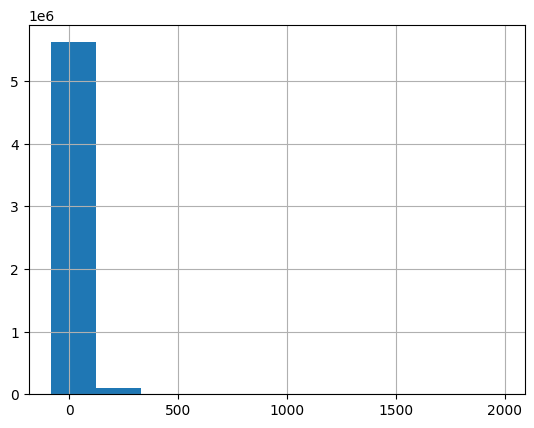

In [126]:
fig = plt.figure()
df.DEPARTURE_DELAY = df.DEPARTURE_DELAY.astype(float)
df.DEPARTURE_DELAY.hist()
plt.show()

Here is a good example of histogram construction by values in a column `DEPARTURE_DELAY`

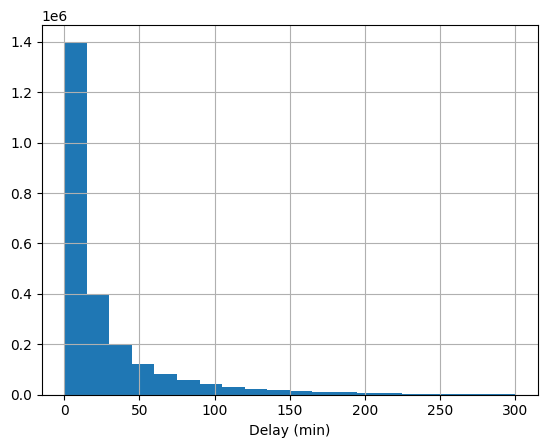

In [127]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

df.DEPARTURE_DELAY.hist(bins=20, range=(0, 300))
plt.xlabel('Delay (min)')
plt.show()

Basic statistics

In [128]:
df.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5726566.0,5.726566e+06,5.726566e+06,5.726566e+06,5.726566e+06,5.726566e+06,5.726566e+06,5.726566e+06,5.726566e+06,5.726566e+06,...,5.726566e+06,5.726566e+06,5.714008e+06,5.726566e+06,5726566.0,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.547739e+00,1.570838e+01,3.932544e+00,2.164559e+03,1.328844e+03,1.335034e+03,9.317259e+00,1.607021e+01,1.357075e+03,...,1.493263e+03,1.476491e+03,4.407057e+00,2.192937e-03,0.0,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.396818e+00,8.774499e+00,1.986050e+00,1.754782e+03,4.834667e+02,4.963657e+02,3.693294e+01,8.891484e+00,4.979701e+02,...,5.068261e+02,5.263197e+02,3.927130e+01,4.677744e-02,0.0,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.280000e+02,9.160000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.681000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.0,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.211000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.917000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.0,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.320000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,0.0,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [129]:
df.loc[df.DEPARTURE_DELAY > 0, 'DEPARTURE_DELAY'].mean()

32.56361401062445

In [130]:
df.loc[df.DEPARTURE_DELAY > 0, 'DEPARTURE_DELAY'].std()

52.9740164970783

In [131]:
df.loc[df.DEPARTURE_DELAY > 0, 'DEPARTURE_DELAY'].median()

14.0

Let's merge columns `YEAR`, `MONTH`, `DAY` into a single column `DATE`

In [132]:
pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])

0         2015-01-01
1         2015-01-01
2         2015-01-01
3         2015-01-01
4         2015-01-01
             ...    
5819074   2015-12-31
5819075   2015-12-31
5819076   2015-12-31
5819077   2015-12-31
5819078   2015-12-31
Length: 5726566, dtype: datetime64[ns]

In [133]:
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01


Example of using the method `loc` to select rows and columns

In [134]:
df.loc[df.DATE <= pd.to_datetime('2015-02-14')]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681023,2015,2,14,6,B6,1503,N547JB,JFK,SJU,2359,...,45.0,0,0,NaN,45.0,0.0,0.0,0.0,0.0,2015-02-14
681024,2015,2,14,6,US,1770,N825AW,SLC,PHL,2359,...,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-02-14
681025,2015,2,14,6,US,467,N642AW,PHX,MSP,2359,...,86.0,0,0,NaN,0.0,0.0,86.0,0.0,0.0,2015-02-14
681026,2015,2,14,6,F9,300,N204FR,DEN,TPA,2359,...,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-02-14


Now we have to drop unnecessary columns

In [135]:
df = df.drop(columns=['YEAR', 'MONTH', 'DAY'])
df.head()

,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
3,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
4,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01


Let's change the order of columns

In [136]:
cols = list(df.columns)
cols[-1:] + cols[:-1]

['DATE',
 'DAY_OF_WEEK',
 'AIRLINE',
 'FLIGHT_NUMBER',
 'TAIL_NUMBER',
 'ORIGIN_AIRPORT',
 'DESTINATION_AIRPORT',
 'SCHEDULED_DEPARTURE',
 'DEPARTURE_TIME',
 'DEPARTURE_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'SCHEDULED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'WHEELS_ON',
 'TAXI_IN',
 'SCHEDULED_ARRIVAL',
 'ARRIVAL_TIME',
 'ARRIVAL_DELAY',
 'DIVERTED',
 'CANCELLED',
 'CANCELLATION_REASON',
 'AIR_SYSTEM_DELAY',
 'SECURITY_DELAY',
 'AIRLINE_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'WEATHER_DELAY']

Lets's move the last column to the first position

In [137]:
df = df[cols[-1:] + cols[:-1]]
df.head()

,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015-01-01,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-01,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Let's see the column ORIGIN_AIRPORT. It contains many incomprehensible values

In [138]:
df.ORIGIN_AIRPORT.unique()

array(['ANC', 'LAX', 'SFO', 'SEA', 'LAS', 'DEN', 'SLC', 'PDX', 'FAI',
       'MSP', 'PHX', 'SJU', 'PBG', 'IAG', 'PSE', 'BQN', 'ORD', 'GEG',
       'HNL', 'ONT', 'MCO', 'BOS', 'HIB', 'ABR', 'DFW', 'MKE', 'IAH',
       'BNA', 'BRO', 'VPS', 'BOI', 'BJI', 'PHL', 'SBN', 'EUG', 'IAD',
       'BUF', 'PWM', 'JFK', 'CRP', 'PIA', 'FAT', 'SMF', 'AUS', 'MCI',
       'ATL', 'JAX', 'MFR', 'IDA', 'MSN', 'DCA', 'SAT', 'CHS', 'SBA',
       'IND', 'CLE', 'GSP', 'BDL', 'RIC', 'BFL', 'OMA', 'RDM', 'FLL',
       'CID', 'TPA', 'SYR', 'ROC', 'TYR', 'LAN', 'GSO', 'EWR', 'PBI',
       'RSW', 'OAK', 'PVD', 'RNO', 'PIT', 'ABQ', 'MIA', 'BWI', 'TUL',
       'LGA', 'LIT', 'MSY', 'OKC', 'ATW', 'PNS', 'MEM', 'TYS', 'MHT',
       'SAV', 'CLT', 'GRB', 'ABE', 'JAN', 'OAJ', 'FAR', 'ERI', 'LEX',
       'CWA', 'TTN', 'RDU', 'CVG', 'BHM', 'ACY', 'DTW', 'RAP', 'TUS',
       'EAU', 'DLH', 'FSD', 'INL', 'SPI', 'CLD', 'COD', 'CMH', 'PSC',
       'CPR', 'ACV', 'DAL', 'PAH', 'MRY', 'ESC', 'ISN', 'PSP', 'CAE',
       'STL', 'BTV',

How to separate normal values from abnormal values? For example, by string length:

In [139]:
df.ORIGIN_AIRPORT.apply(len)

0          3
1          3
2          3
3          3
4          3
          ..
5819074    3
5819075    3
5819076    3
5819077    3
5819078    3
Name: ORIGIN_AIRPORT, Length: 5726566, dtype: int64

Filter the dataset (in practice you should not trust the string length, it is better to check directly if the given record is in the airport directory)

In [140]:
df = df.loc[(df.ORIGIN_AIRPORT.apply(len) == 3) &
            (df.DESTINATION_AIRPORT.apply(len) == 3)]

In [141]:
df.AIRLINE.unique()

array(['AS', 'AA', 'US', 'DL', 'NK', 'UA', 'HA', 'B6', 'OO', 'EV', 'F9',
       'WN', 'MQ', 'VX'], dtype=object)

Method `loc` allows you to get slices of the dataset. For example, let's find out from which cities the airline `AA` flies:

In [142]:
df.loc[df.AIRLINE == 'AA', 'ORIGIN_AIRPORT'].unique()

array(['LAX', 'SFO', 'LAS', 'SEA', 'DEN', 'PHX', 'MCO', 'DFW', 'BOS',
       'IAH', 'SAT', 'JFK', 'AUS', 'EWR', 'MIA', 'SLC', 'BWI', 'MCI',
       'TUL', 'LGA', 'LIT', 'PDX', 'TPA', 'SMF', 'MSY', 'OMA', 'OKC',
       'DCA', 'STL', 'SJU', 'MKE', 'BNA', 'MSP', 'SAN', 'RDU', 'IAD',
       'CLT', 'PHL', 'PBI', 'JAX', 'PIT', 'COS', 'DSM', 'RIC', 'BDL',
       'SNA', 'BHM', 'MEM', 'CLE', 'ATL', 'FAT', 'DAY', 'ORF', 'IND',
       'CMH', 'ELP', 'ONT', 'RNO', 'SJC', 'ABQ', 'PSP', 'RSW', 'FLL',
       'JAC', 'TUS', 'HNL', 'ORD', 'EGE', 'DTW', 'STT', 'MFE', 'STX',
       'HDN', 'ICT', 'KOA', 'HOU', 'OGG', 'GUC', 'LIH', 'SDF', 'MTJ',
       'PNS', 'LBB', 'XNA', 'ANC', 'OAK', 'PVD', 'BUF', 'BOI', 'ALB',
       'PWM', 'SYR', 'GEG', 'GSO', 'CHS', 'ILM', 'ROC', 'MDT'],
      dtype=object)

Также легко найти из каких городов АА делает наибольшее число рейсов

It is also easy to find out from which cities `AA` makes the largest number of flights

In [143]:
df.loc[df.AIRLINE == 'AA', 'ORIGIN_AIRPORT'].value_counts()

DFW    131464
ORD     49688
MIA     47792
CLT     41512
LAX     32409
        ...  
GUC       113
MDT        49
MTJ        29
XNA        18
LIT         9
Name: ORIGIN_AIRPORT, Length: 98, dtype: int64

Sometimes it is convenient to look at graphs instead of tables. The dataframe and series have a built-in plot method

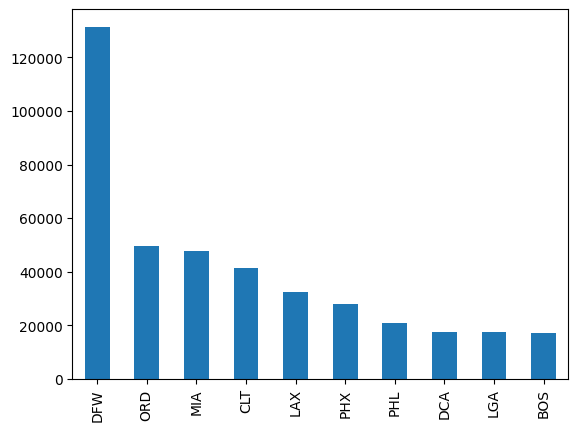

In [144]:
fig = plt.figure()

df.loc[df.AIRLINE == 'AA', 'ORIGIN_AIRPORT'].value_counts()[:10].plot(kind='bar')
plt.show()

Another way to find the carrier with the largest number of flights. By the method of `groupby`

In [145]:
df.groupby('AIRLINE').size().sort_values(ascending=False)

AIRLINE
WN    1140890
DL     796418
AA     638313
OO     529394
EV     511186
UA     463158
MQ     257726
B6     240906
US     194586
AS     157268
NK     105198
F9      82142
HA      69863
VX      55924
dtype: int64

Let's find out how much time the planes of each airline spend in the air. Note that first you need to convert string values to a numeric type:

In [146]:
df.AIR_TIME = df.AIR_TIME.astype(float)
df.groupby('AIRLINE')['AIR_TIME'].sum()

AIRLINE
AA     89473152.0
AS     24786823.0
B6     34637886.0
DL     92137719.0
EV     37151025.0
F9     10691374.0
HA      5931683.0
MQ     17292639.0
NK     13905437.0
OO     39974767.0
UA     76413094.0
US     24428249.0
VX     10214217.0
WN    117560358.0
Name: AIR_TIME, dtype: float64

Let's find the airline with the largest geography of flights (how else can you solve this problem?)

In [147]:
df.groupby('AIRLINE')['ORIGIN_AIRPORT'].nunique().sort_values()[::-1]

AIRLINE
OO    211
EV    181
DL    156
MQ    133
AA     98
UA     94
WN     86
US     79
AS     67
B6     64
F9     63
NK     34
VX     21
HA     17
Name: ORIGIN_AIRPORT, dtype: int64

Which airline has the most routes?

In [148]:
df['ROUTE'] = df['ORIGIN_AIRPORT'] + df['DESTINATION_AIRPORT']
df.groupby('AIRLINE')['ROUTE'].nunique().sort_values()[::-1]

AIRLINE
EV    1381
WN    1333
OO    1322
DL     963
AA     707
UA     702
MQ     428
B6     341
US     340
F9     333
NK     316
AS     251
VX      71
HA      56
Name: ROUTE, dtype: int64

It's time to replace the airline and airport codes with full names. To do this, you need to join tables from the dataset. There are at least 4 ways to do this:

![](https://www.tektutorialshub.com/wp-content/uploads/2019/12/Differences-in-inner-and-left-right-and-full-outer-joins.png)

Table of carriers

In [149]:
df_air = pd.read_csv('/content/drive/MyDrive/archive/airlines.csv')
df_air.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


Prepare the left table

In [150]:
tmp = df.groupby('AIRLINE')['ROUTE'].nunique().sort_values()[::-1].to_frame().reset_index()
tmp.head()

,AIRLINE,ROUTE
0,EV,1381
1,WN,1333
2,OO,1322
3,DL,963
4,AA,707


Let's do one optional action to rename columns

In [151]:
tmp = tmp.rename(columns={'AIRLINE': 'IATA_CODE'})
tmp.head()

,IATA_CODE,ROUTE
0,EV,1381
1,WN,1333
2,OO,1322
3,DL,963
4,AA,707


Let's join two tables by the key IATA_CODE

In [152]:
tmp.merge(df_air, on='IATA_CODE')

,IATA_CODE,ROUTE,AIRLINE
0,EV,1381,Atlantic Southeast Airlines
1,WN,1333,Southwest Airlines Co.
2,OO,1322,Skywest Airlines Inc.
3,DL,963,Delta Air Lines Inc.
4,AA,707,American Airlines Inc.
5,UA,702,United Air Lines Inc.
6,MQ,428,American Eagle Airlines Inc.
7,B6,341,JetBlue Airways
8,US,340,US Airways Inc.
9,F9,333,Frontier Airlines Inc.


Now let's work with airports and display all routes of one of the companies on a geographical map

In [153]:
df_arp = pd.read_csv('/content/drive/MyDrive/archive/airports.csv')
df_arp.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


We will need the `basemap` library. Most likely, you will need to install it using the `pip install basemap` command in the terminal or in the notebook cell

In [154]:
!pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 19.5 MB/s eta 0:00:00


Let's draw a map

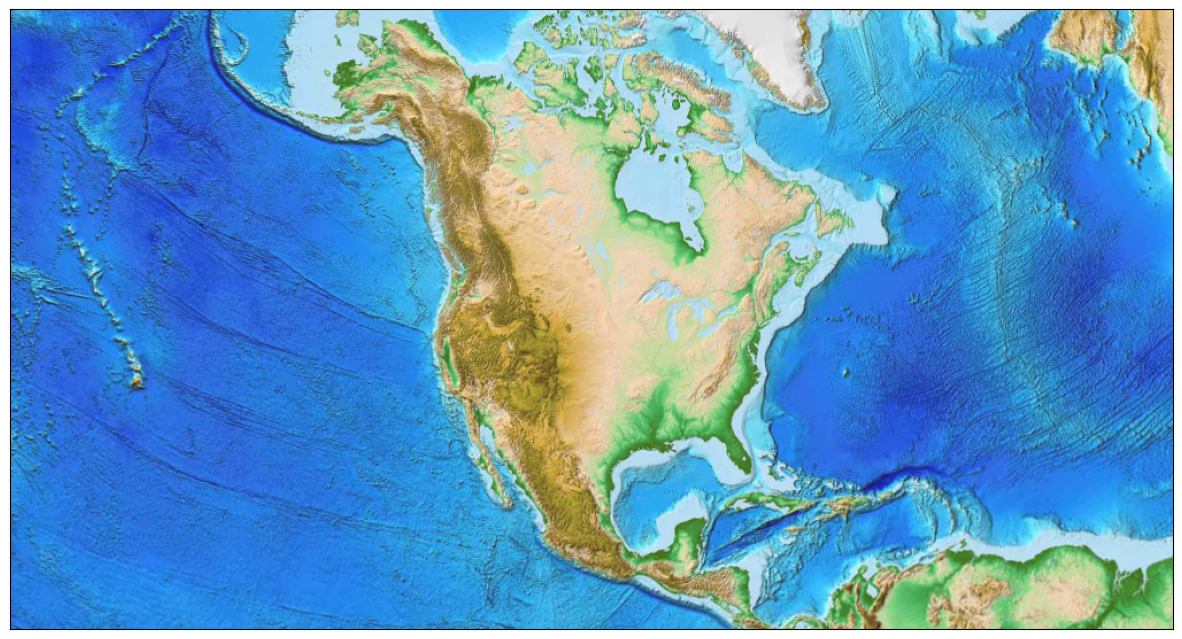

In [155]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 10))
land = Basemap(projection='lcc', resolution=None,
               width=15E6, height=8E6,
               lat_0=45, lon_0=-100,)
land.etopo(scale=0.5, alpha=0.9)
plt.show()

Now let's choose one carrier `NK` and all its routes:

In [156]:
routes = df.loc[df.AIRLINE == 'NK', ['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']].drop_duplicates()
routes

KeyboardInterrupt: 

We need to create two arrays with the coordinates of the departure and landing cities

In [ ]:
orig = routes[['ORIGIN_AIRPORT']].merge(df_arp,
                                        left_on='ORIGIN_AIRPORT',
                                        right_on='IATA_CODE',
                                        how='left')
dest = routes[['DESTINATION_AIRPORT']].merge(df_arp,
                                             left_on='DESTINATION_AIRPORT',
                                             right_on='IATA_CODE',
                                             how='left')
orig

To plot a point with a given latitude/longitude on the map, the geographic coordinates need to be converted to x, y. Technically, this is done like this:
```python
x, y = land(long, lat)
```

In practice, this can be implemented in several ways. Below are two options:

In [ ]:
orig_xy = orig[['LONGITUDE', 'LATITUDE']].apply(lambda x: land(*x), axis=1).values
orig_xy = np.stack(orig_xy) #делаем из списка пар координат двумерный массив:
orig_xy

Another way to convert coordinates to x, y

In [ ]:
dest_xy = np.array(land(dest['LONGITUDE'], dest['LATITUDE'])).T
dest_xy

Let's draw lines on the map

In [ ]:
fig = plt.figure(figsize=(15, 10))
m = Basemap(projection='lcc', resolution=None,
            width=15E6, height=8E6,
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.9)

for a, b in zip(orig_xy, dest_xy):
    plt.plot([a[0], b[0]], [a[1], b[1]], 'k--', lw=1, alpha=0.5)
plt.show()

# Homework

The homework is to prepare a report for the Ministry of Transport, revealing the nature and characteristics of flight delays. The report should help identify problem areas and contribute to decision-making. Therefore, strive not to state general facts, but to show problems. For example, the fact "the average departure delay is 15 minutes" by itself says little and does not help to understand why this is happening. On the contrary, a graph showing that on Mondays delays increase threefold compared to other days against the background of an increase in the number of flights and passengers suggests a possible cause of the problem: airports cannot cope with uneven load.

The report should be in the form of a notebook with a clear structure. At the beginning of the Markdown cell there is a brief description of the question under study (what we will study), then the code and all its outputs (tables, graphs, values), then again in the Markdown cell in which your brief conclusion is formulated.

The report should contain at least **5 results** confirmed by graphs. For variety of material, use different types of diagrams. All graphs should be provided with the necessary signatures (axis designations, title, color scheme legend).

To solve the problems, use the methods of the `pandas` library.

Dear management of the Ministry of Transport! You have been provided with a report on flight delays in 2015. Here I analyzed the dependence of flight delays on various factors.

1) The first flight delay problem that I would like to discuss - on which day of the week do airports face the most flight delays. This histogram based on our information from the file will show if airports can deal with an uneven load throughout the week.

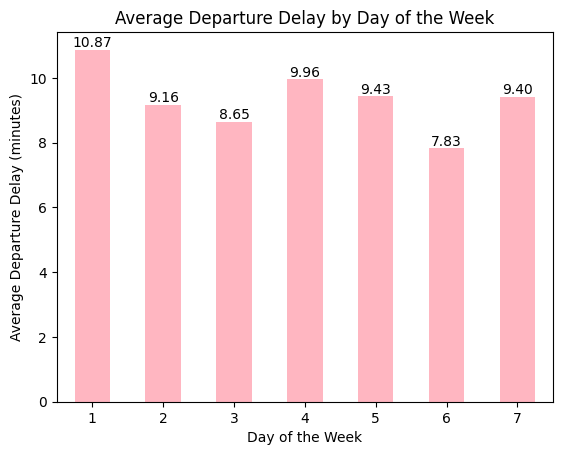

The difference between the biggest and smallest average delay during the week is: 3.04 minutes


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
flights_df = pd.read_csv('/content/drive/MyDrive/archive/flights.csv', dtype={'DAY_OF_WEEK': str, 'DEPARTURE_DELAY': float}, low_memory=False)

# Calculate the average departure delay for each day of the week
avg_delay_by_day = flights_df.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].mean()

fig, ax = plt.subplots()
avg_delay_by_day.plot(kind='bar', color='lightpink', ax=ax)
plt.title('Average Departure Delay by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks(rotation=0)

for i, v in enumerate(avg_delay_by_day):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()
#Difference between the biggest and smallest average delay
difference = avg_delay_by_day.max() - avg_delay_by_day.min()
print(f"The difference between the biggest and smallest average delay during the week is: {difference:.2f} minutes")

From this histogram we can see that all the coloumns don't have a huge difference from day to day (as you can see, the biggest difference is circa 3 minutes), so we can say, that airports cope pretty well with an uneven load during the week.


2) The next aspect that I will analyze - if the month of the flight affects the flight delays. This will show if airports and planes are ready to deal with weather conditions, such as temperature, rainfall, etc. Another aspect that we can analyze - does the departure delay depends on when people travel the most.

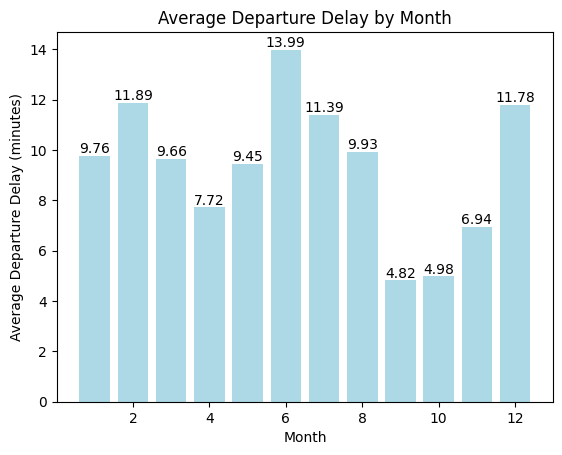

The difference between the biggest and smallest average delay during the year is: 9.16 minutes


In [2]:
import pandas as pd
import matplotlib.pyplot as plt


flights_df = pd.read_csv('/content/drive/MyDrive/archive/flights.csv', low_memory=False)

# Calculate the average departure delay for each month
average_delay_per_month = flights_df.groupby('MONTH')['DEPARTURE_DELAY'].mean()

plt.bar(average_delay_per_month.index, average_delay_per_month.values, color='lightblue')
plt.xlabel('Month')
plt.ylabel('Average Departure Delay (minutes)')
plt.title('Average Departure Delay by Month')

for i, v in enumerate(average_delay_per_month):
    plt.text(i+1, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()
difference = average_delay_per_month.max() - average_delay_per_month.min()
print(f"The difference between the biggest and smallest average delay during the year is: {difference:.2f} minutes")

Here we can draw a conclusion that the richest on delays month are June and July (which is quite obvious, because everyone goes on holidays and all the airports are overcrowded). On the other hand the delays in, for examples, December, January and February depend on severe weather conditions. \\
Also the smallest delays we observe in September and October, because the weather is still quite pleasant, but not so many people travel somewhere in this period of time.


3) Another aspect that I find crucial - if flight delays depend on the airlines that use the airports. And if yes - we can conclude, that their work is ineffective and we should contact their management to solve the problem.

The difference between the biggest and smallest average delay is: 15.46 minutes
Top three airlines with the biggest percentage of average departure delay:
AIRLINE
NK    15.944766
UA    14.435441
F9    13.350858
Name: DEPARTURE_DELAY, dtype: float64


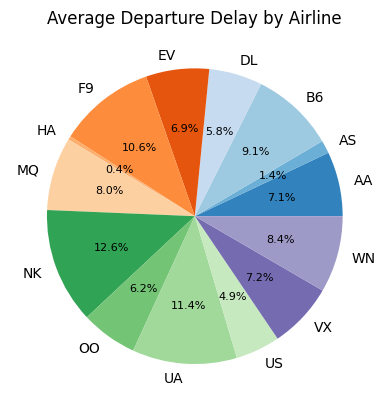

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

flights_df = pd.read_csv('/content/drive/MyDrive/archive/flights.csv', low_memory=False)

average_delay_per_airline = flights_df.groupby('AIRLINE')['DEPARTURE_DELAY'].mean()

colors = plt.cm.tab20c.colors
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(average_delay_per_airline, labels=average_delay_per_airline.index, autopct='%1.1f%%', colors=colors)

plt.setp(autotexts, size=8, weight="normal")

plt.title('Average Departure Delay by Airline')

difference = average_delay_per_airline.max() - average_delay_per_airline.min()
print(f"The difference between the biggest and smallest average delay is: {difference:.2f} minutes")
sorted_average_delay = average_delay_per_airline.sort_values(ascending=False)

top_three_airlines = sorted_average_delay.head(3)
print("Top three airlines with the biggest percentage of average departure delay:")
print(top_three_airlines)


From this chart we can see that airlines with the biggest delays are Spirit Air Lines, United Air Lines Inc. and Frontier Airlines Inc. I suggest we contact these airlines and find out, where the problems come from and how we can solve them.

4) Another aspect that it is essential to discuss if there is a connection between the origin airport and the flight delay. There is always a possibility that the airport is too small, or poorly constructed, or the only airport in the area, which leads to departure delays.

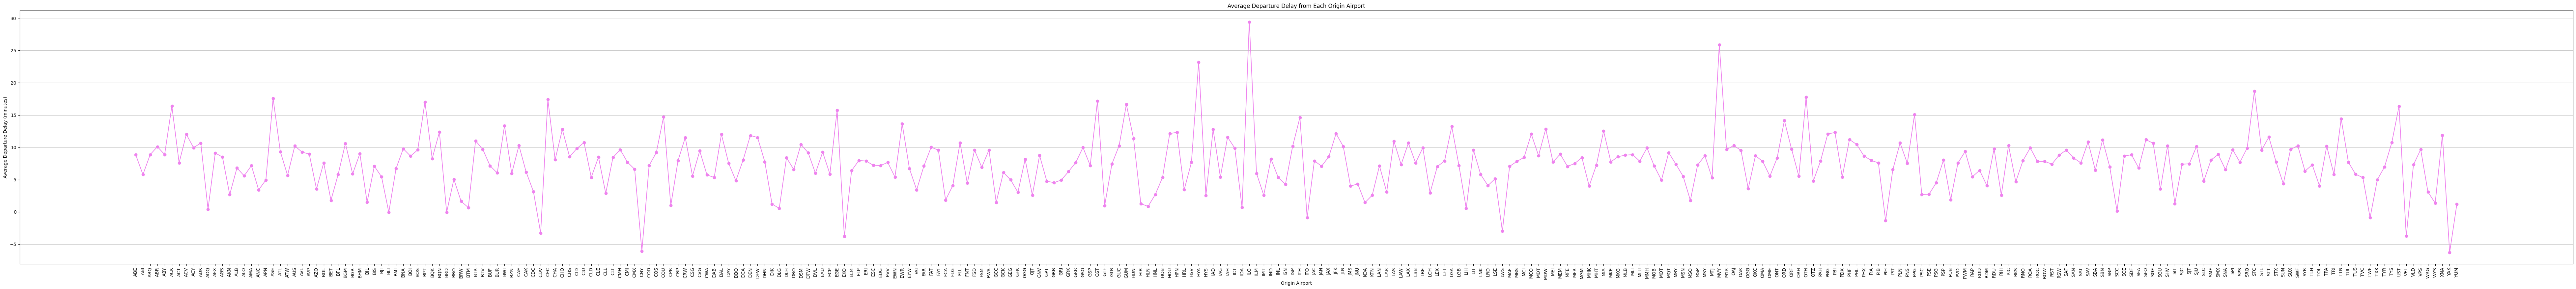

For more detailed information, please, feel free to press the graph
Top Three Airports with Longest Average Departure Delay:
Airport Code: ILG, Average Delay: 29.39 minutes
Airport Code: MVY, Average Delay: 25.91 minutes
Airport Code: HYA, Average Delay: 23.18 minutes


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

flights_df = pd.read_csv('/content/drive/MyDrive/archive/flights.csv', low_memory=False)

flights_df = flights_df[flights_df['ORIGIN_AIRPORT'].astype(str).apply(len) == 3]

average_delay_per_airport = flights_df.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean()

plt.figure(figsize=(100, 10))
plt.plot(average_delay_per_airport, marker='o', color = 'violet')
plt.title('Average Departure Delay from Each Origin Airport')
plt.xlabel('Origin Airport')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks(rotation=90)
plt.grid(axis='y', linewidth=0.5)
plt.show()
print("For more detailed information, please, feel free to press the graph")
top_three_airports = average_delay_per_airport.sort_values(ascending=False).head(3)
print("Top Three Airports with Longest Average Departure Delay:")
for airport_code, delay in top_three_airports.items():
    print(f"Airport Code: {airport_code}, Average Delay: {delay:.2f} minutes")

As we can observe, there are three airports with the longest average delays time (>20 minutes): Wilmington Airport, Martha's Vineyard Airport and Barnstable Municipal Airport. Our next step is to conact their management, analyze the area and find a solution.

5) And the last, but the most interestion question - is there a connection between flight delays and the expected distance.

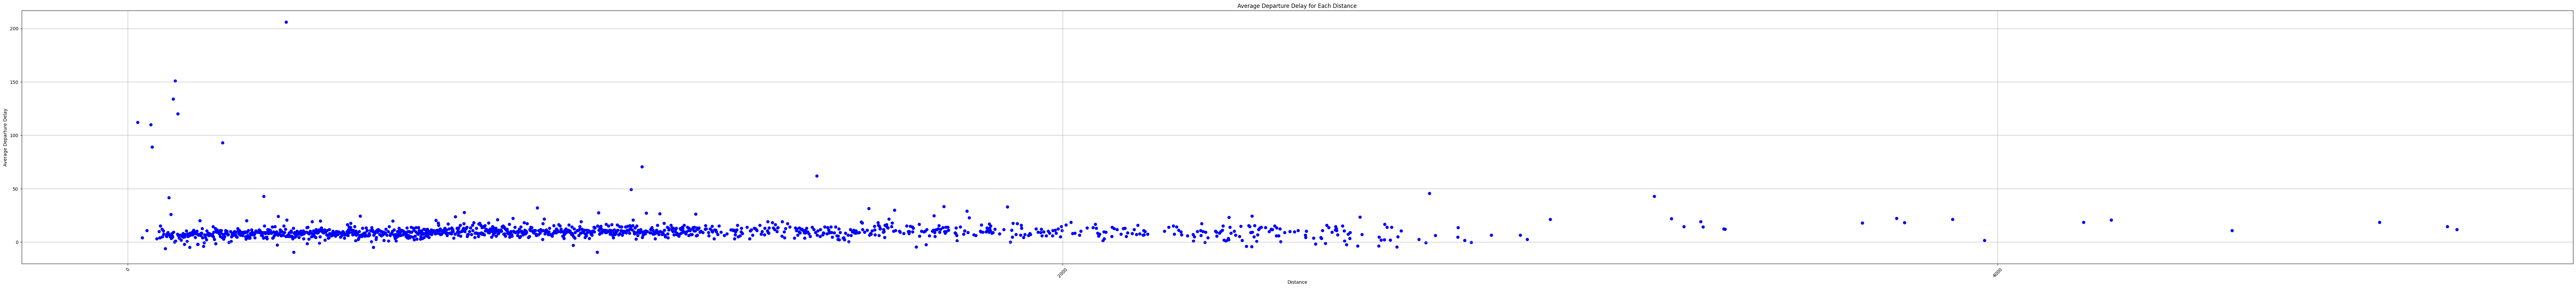

For more detailed information, please, feel free to press the graph
Difference between the biggest and smallest average departure delay: 215.5
Top Three Distances with the Biggest Average Delay:
         DISTANCE ORIGIN_AIRPORT DESTINATION_AIRPORT
160232        101            MSO                 BTM
2123513       339            SGF                 HYS
3889431        97            FCA                 MSO


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

flights_df = pd.read_csv('/content/drive/MyDrive/archive/flights.csv', low_memory=False)

avg_departure_delay = flights_df.groupby('DISTANCE')['DEPARTURE_DELAY'].mean()

top_3_distances = avg_departure_delay.nlargest(3)

top_3_airports = flights_df[flights_df['DISTANCE'].isin(top_3_distances.index)][['DISTANCE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']].drop_duplicates()

plt.figure(figsize=(100, 10))
plt.scatter(avg_departure_delay.index, avg_departure_delay.values, marker='o', color='blue')  # Using scatter plot instead of line plot
plt.xlabel('Distance')
plt.ylabel('Average Departure Delay')
plt.title('Average Departure Delay for Each Distance')
plt.grid(True)

plt.xticks(range(0, int(avg_departure_delay.index.max()) + 1, 2000), rotation=45)

plt.show()

difference = avg_departure_delay.max() - avg_departure_delay.min()
print("For more detailed information, please, feel free to press the graph")
print("Difference between the biggest and smallest average departure delay:", difference)
print("Top Three Distances with the Biggest Average Delay:")
print(top_3_airports)









From this graph we can understand that normally the distance does not affect flight delays. However there are a few abnormalities that we have to discuss. I suggest we contact the airport and our flight experts, why this can happen and how we fix it. (maybe one of the reasons is in our above research)